# Blog post on Stackoverflow Data

This shows step by step the analysis that was conducted to address several questions on the 2017 stackoverflow survey data. Focus was on social and behavioral aspects if you will:
What makes people update their resumes? Are StackOverflow users more inclined to be the "challenge myself" type or "compete with peers" type?
How's the distribution of people who like/dislike working with other people's code and can we predict wether people like/dislike working with other people's code?


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

#### Read CSV Files

In [34]:
df=pd.read_csv("so-survey-2017/survey_results_public.csv")
df_schema=pd.read_csv("so-survey-2017/survey_results_schema.csv")

### Data understanding

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [36]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Check Columns that we want to use for further analysis: 
OtherPeoplesCode, ChallengeMyself, CompetePeers, ResumePrompted, SelfTaughtType, EnjoyDebugging, DifficultCommunication, ShipIt, ProgramHobby, Professional, FormalEducation, HomeRemote

In [5]:
df.ResumePrompted.unique()

array([nan, 'A recruiter contacted me',
       'I was just giving it a regular update',
       'I completed a major project, assignment, or contract',
       'I received bad news about the future of my company or depart',
       'A friend told me about a job opportunity', 'Something else',
       "I saw an employer's advertisement",
       'I received negative feedback on my job performance'], dtype=object)

define function for calculating the percentage of missing values

In [8]:
def missing_values(column):
    """returns the percentage of missing values for the provided column"""
    return (df[column].isnull().sum()/df.shape[0])*100

In [10]:
#percentage of missing values
print(missing_values("ResumePrompted"))

56.294754047322535


We have about 56% missing values in this column

define function for building bar chart of value distribution

In [20]:
def value_dist(column):
    """produces a bar chart with value distribution of the provided column"""
    (df[column].value_counts()/df.shape[0]).plot(kind="bar")
    s_title=f"Distribution of values in {column} column"
    plt.title(s_title)
    return


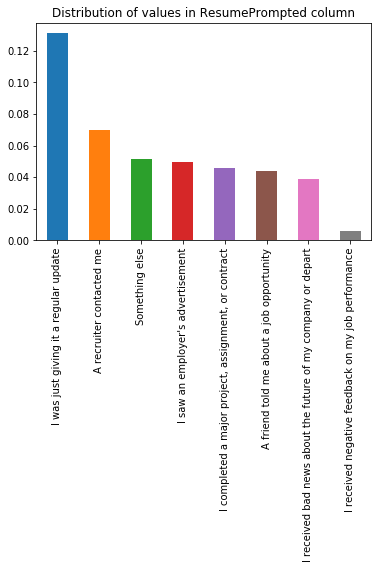

In [21]:
#check distribution of values
value_dist("ResumePrompted")

We can see that the single most selected option (about 13%) was that people update their resume on a regular basis. Less than 1% update their resume due to receiving negative feedback. 

In [103]:
df.OtherPeoplesCode.unique()

array([nan, 'Disagree', 'Agree', 'Somewhat agree', 'Strongly agree',
       'Strongly disagree'], dtype=object)

In [104]:
#percentage of missing values
print(missing_values("OtherPeoplesCode"))

0.4236651618929016

We have about 42% missing values in this column

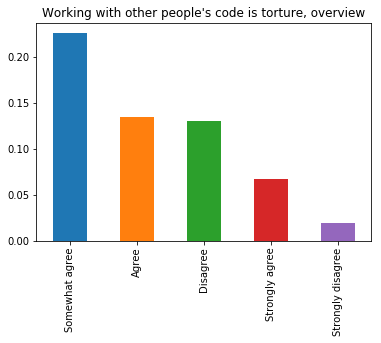

In [105]:
#check distribution of values
value_dist("OtherPeoplesCode")

In this case, the question was if it is torture to work with other peoples code

In [106]:
df.ChallengeMyself.unique()

array(['Agree', nan, 'Strongly agree', 'Somewhat agree', 'Disagree',
       'Strongly disagree'], dtype=object)

In [22]:
#percentage of missing values
print(missing_values("ChallengeMyself"))

39.73575653798257


We have about 40% missing values in this column

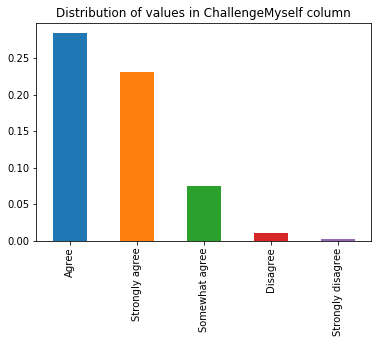

In [25]:
#check distribution of values
value_dist("ChallengeMyself")

In [109]:
df.CompetePeers.unique()

array(['Disagree', nan, 'Somewhat agree', 'Strongly agree',
       'Strongly disagree', 'Agree'], dtype=object)

In [110]:
#percentage of missing values
print(missing_values("CompetePeers"))

0.40049034869240346

We have about 40% missing values in this column

Let's look at the distribution.

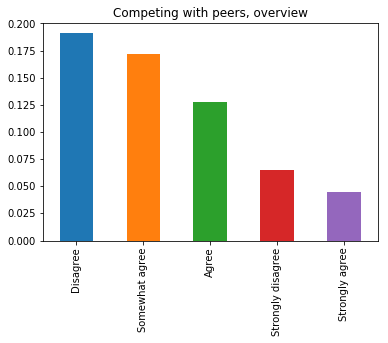

In [111]:
#check distribution of values
value_dist("CompetePeers")

In [23]:
print(missing_values("SelfTaughtTypes"))

47.97828455790785


In [113]:
df.SelfTaughtTypes.unique()

array([nan, 'Official documentation; Stack Overflow Q&A; Other',
       'Official documentation; Trade book; Textbook; Stack Overflow Q&A; Non-Stack online communities; Company internal community; Friends network; Built-in help; Other',
       ...,
       'Non-Stack online communities; Tutoring/mentoring; Friends network',
       'Official documentation; Trade book; Textbook; Non-Stack online communities; Company internal community; Tutoring/mentoring; Friends network; Built-in help',
       'Official documentation; Non-Stack online communities; Company internal community; Tutoring/mentoring; Friends network'],
      dtype=object)

In [114]:
df.SelfTaughtTypes.nunique()

1149

=> Will split into different columns of individual attributes later. It is hard to work with it like this.

Examine EnjoyDebugging column, percentage of missing values first, then distribution of values

In [115]:
print(missing_values("EnjoyDebugging"))

0.42082425280199254

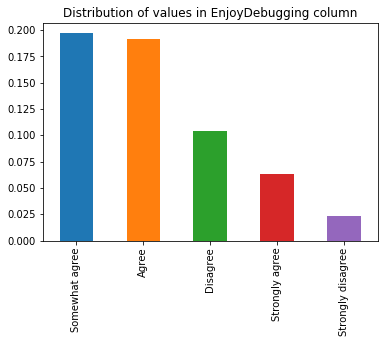

In [26]:
#check distribution of values
value_dist("EnjoyDebugging")

Examine DifficultCommunication column, percentage of missing values first

In [120]:
print(missing_values("DifficultCommunication"))

0.4232565379825654

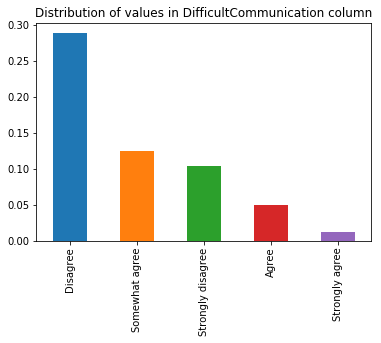

In [27]:
#check distribution of values
value_dist("DifficultCommunication")

Examine ShipIt column, percentage of missing values first

In [122]:
print(missing_values("ShipIt"))

0.4232370797011208

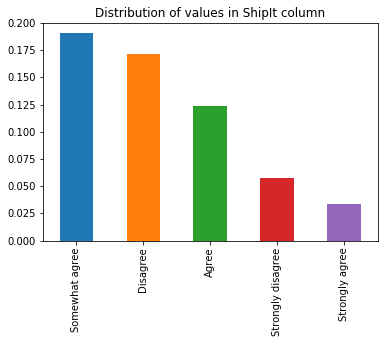

In [28]:
#check distribution of values
value_dist("ShipIt")

Examine ProgramHobby column, percentage of missing values first

In [24]:
print(missing_values("ProgramHobby"))

0.0


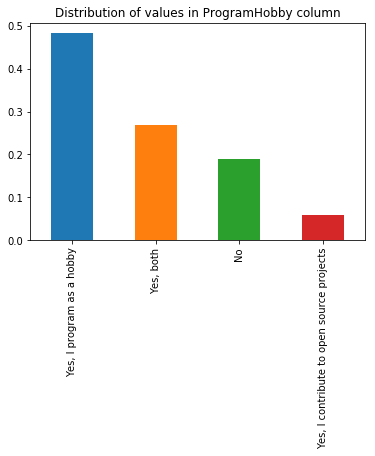

In [29]:
#check distribution of values
value_dist("ProgramHobby")

Examine Professional column, percentage of missing values first

In [126]:
print(missing_values("Professional"))

0.0

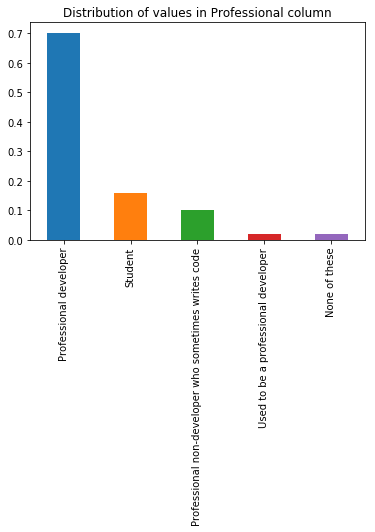

In [30]:
#check distribution of values
value_dist("Professional")

Examine FormalEducation column, percentage of missing values first

In [128]:
print(missing_values("FormalEducation"))

0.0

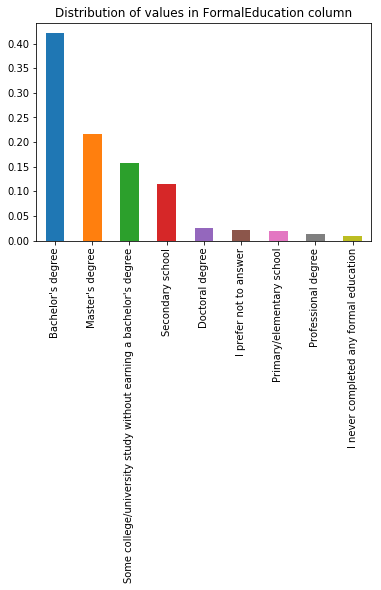

In [31]:
#check distribution of values
value_dist("FormalEducation")

Examine HomeRemote column, percentage of missing values first

In [130]:
print(missing_values("HomeRemote"))

0.1436799501867995

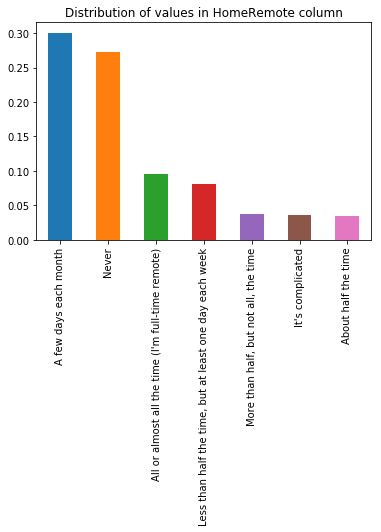

In [32]:
#check distribution of values
value_dist("HomeRemote")

This concludes the examination of the columns we want to use for prediction later. None of them seems to have a very high number of missing values. So I will try to drop rows with null values instead of imputing values. Will impute if we end up with too few rows! However we will have to work on the selftaughttypes column.

### Data preperation

Splitting selftaughttypes into individual strings, based on ; separator

In [132]:
df.SelfTaughtTypeslist=df.SelfTaughtTypes.str.split(";")

C:\Users\boert\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [133]:
df.SelfTaughtTypeslist.apply(pd.Series).stack().value_counts()

Official documentation           21434
 Stack Overflow Q&A              19986
 Non-Stack online communities    13348
 Built-in help                   12541
 Trade book                      11645
 Stack Overflow Docs              7185
 Friends network                  5499
 Textbook                         5098
 Company internal community       4911
 Other                            2951
Trade book                        2744
Stack Overflow Q&A                1423
 Tutoring/mentoring               1147
Textbook                           460
Non-Stack online communities       198
Other                              178
Stack Overflow Docs                163
Built-in help                       44
Friends network                     38
Company internal community          36
Tutoring/mentoring                  17
dtype: int64

introduce new columns instead of selftaughttypes - depending on the individual values

In [134]:
#put all possible values in array, not considering spaces
possible_vals = ["Official documentation", "Stack Overflow Q&A", 
                 "Other", "Trade book", "Textbook", "Stack Overflow Docs",
                 "Non-Stack online communities", "Company internal community", "Friends network",
                 "Built-in help", "Tutoring/mentoring"]
#dropping na and resetting index
df=df.dropna(subset=["SelfTaughtTypes"]).reset_index()
df=df.reindex(df.columns.tolist() + possible_vals, axis=1)
for val in possible_vals:
    df[val]=df["SelfTaughtTypes"].apply(lambda x: 1 if val in x else 0)

See if it worked

In [135]:
df.head()

,index,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,...,Stack Overflow Q&A,Other,Trade book,Textbook,Stack Overflow Docs,Non-Stack online communities,Company internal community,Friends network,Built-in help,Tutoring/mentoring
0,1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",...,1,1,0,0,0,0,0,0,0,0
1,2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...",...,1,1,1,1,0,1,1,1,1,0
2,5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,...,1,0,0,0,0,1,0,0,1,0
3,6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",...,1,0,1,1,0,0,0,1,1,0
4,7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),...,1,0,1,0,1,0,0,0,1,0


define dataframe for predicting and see how many rows are left after dropping NA

In [136]:
#define columns that will be taken into account for predicting otherpeoplescode column
df_pred=df[["HomeRemote","FormalEducation","Professional","ProgramHobby","OtherPeoplesCode","EnjoyDebugging","ShipIt","DifficultCommunication","Official documentation", "Stack Overflow Q&A", 
                 "Other", "Trade book", "Textbook", "Stack Overflow Docs",
                 "Non-Stack online communities", "Company internal community", "Friends network",
                 "Built-in help", "Tutoring/mentoring"]]

#columns do not seem to be terribly well suited for imputing: drop na rows
df_pred=df_pred.dropna()

In [137]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15712 entries, 0 to 26731
Data columns (total 19 columns):
HomeRemote                      15712 non-null object
FormalEducation                 15712 non-null object
Professional                    15712 non-null object
ProgramHobby                    15712 non-null object
OtherPeoplesCode                15712 non-null object
EnjoyDebugging                  15712 non-null object
ShipIt                          15712 non-null object
DifficultCommunication          15712 non-null object
Official documentation          15712 non-null int64
Stack Overflow Q&A              15712 non-null int64
Other                           15712 non-null int64
Trade book                      15712 non-null int64
Textbook                        15712 non-null int64
Stack Overflow Docs             15712 non-null int64
Non-Stack online communities    15712 non-null int64
Company internal community      15712 non-null int64
Friends network                 157

With 15,7k rows to work with, we can try RF and don't need to impute values

In [138]:
y=df_pred.OtherPeoplesCode

In [139]:
X=df_pred.drop(labels="OtherPeoplesCode",axis=1)

In [140]:
#getdummy columns for categorical columns
for col in ["HomeRemote","FormalEducation","Professional","ProgramHobby","EnjoyDebugging","ShipIt","DifficultCommunication"]:
        X=pd.concat([X.drop(col,axis=1),pd.get_dummies(X[col],prefix=col,prefix_sep="_",drop_first=True)],axis=1)

In [141]:
X.head()

,Official documentation,Stack Overflow Q&A,Other,Trade book,Textbook,Stack Overflow Docs,Non-Stack online communities,Company internal community,Friends network,Built-in help,...,EnjoyDebugging_Strongly agree,EnjoyDebugging_Strongly disagree,ShipIt_Disagree,ShipIt_Somewhat agree,ShipIt_Strongly agree,ShipIt_Strongly disagree,DifficultCommunication_Disagree,DifficultCommunication_Somewhat agree,DifficultCommunication_Strongly agree,DifficultCommunication_Strongly disagree
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
6,1,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


#### Modeling

In [142]:
#split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)


In [143]:
#def classifier
rf_model=RandomForestClassifier(max_depth=10, n_estimators=100,min_samples_split=2, random_state=42)
#fit model
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### Evaluation

In [144]:
#check testscore
print(rf_model.score(X_test,y_test))

0.4013576580398812


In [145]:
#check trainscore
rf_model.score(X_train, y_train)

0.49036188397890523

In [146]:
#check what features/columns are most important
df_feature_importance=pd.DataFrame(rf_model.feature_importances_, index=X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(df_feature_importance)

                                                    importance
EnjoyDebugging_Strongly disagree                      0.037834
DifficultCommunication_Disagree                       0.036802
EnjoyDebugging_Disagree                               0.035819
Built-in help                                         0.035664
Trade book                                            0.035037
DifficultCommunication_Strongly disagree              0.032838
Non-Stack online communities                          0.032579
Stack Overflow Docs                                   0.032444
Textbook                                              0.032351
ShipIt_Disagree                                       0.030802
Friends network                                       0.029695
Stack Overflow Q&A                                    0.028885
Official documentation                                0.028815
ProgramHobby_Yes, I program as a hobby                0.028663
ProgramHobby_Yes, both                                0

recheck distribution of otherpeoplescode column after deleting rows with na columns

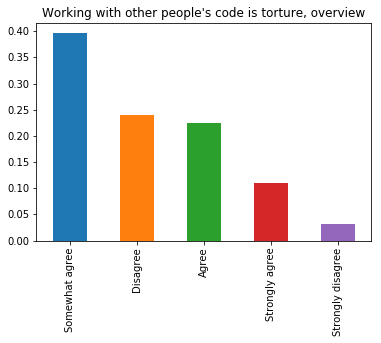

In [147]:
(df_pred.OtherPeoplesCode.value_counts()/df_pred.shape[0]).plot(kind="bar")
plt.title("Working with other people's code is torture, overview");

In [148]:
df_pred.OtherPeoplesCode.value_counts()/df_pred.shape[0]

Somewhat agree       0.395685
Disagree             0.239435
Agree                0.224287
Strongly agree       0.109280
Strongly disagree    0.031314
Name: OtherPeoplesCode, dtype: float64

#### It turns out the random forest model is only marginally better than just predicting "somewhat agree" for everything.

#### How do "Competing against peers" and "challenge myself" attirbutes correlate?
Creating Heatmap of CompetePeers and ChallengeMyself data to see if there are generally more competetive and less competitive people (towards themselves and other people)

In [149]:
df_heatmap=df[["CompetePeers","ChallengeMyself"]]
df_heatmap=df_heatmap.dropna(axis=0,how="any")

In [150]:
piv=df.pivot_table(index=df_heatmap["CompetePeers"],columns=df_heatmap["ChallengeMyself"],aggfunc='size',fill_value=0)

In [151]:
df.pivot_table(index=df_heatmap["CompetePeers"],columns=df_heatmap["ChallengeMyself"],aggfunc='size',fill_value=0)

ChallengeMyself,Agree,Disagree,Somewhat agree,Strongly agree,Strongly disagree
CompetePeers,,,,,
Agree,1814,30,325,1484,4
Disagree,3092,100,819,1988,2
Somewhat agree,2558,67,655,1809,4
Strongly agree,275,9,52,946,5
Strongly disagree,822,50,296,833,27


In [152]:
piv=piv[["Strongly agree","Agree","Somewhat agree","Disagree","Strongly disagree"]]
piv=piv.reindex(["Strongly disagree","Disagree","Somewhat agree","Agree","Strongly agree"])

piv=piv/np.sum(piv.sum())

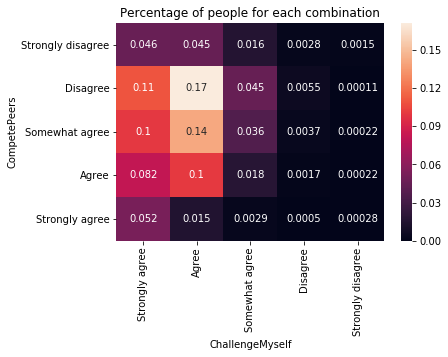

In [153]:
sns.heatmap(data=piv, annot=True, fmt=".2g")
plt.title("Percentage of people for each combination");

We can see that people who answered this question tend to generally be competitive towards themselves/like to challenge themselves. When looking at competitiveness towards peers the picture gets more diverse, there is no clear trend.
When looking at the combined picture we can see that the questions are not stronlgy correlated. While I had somewhat expected that people who like challenging themselves are also more competitive towards others, we can clearly see that this is not the case.